# Project Part 2: Preprocessing & First Model Building and Evaluation

## Getting Images from files

This is the same as in ./data-exploration.ipynb

In [1]:
import os

# define the directories where the imgaes are

pizza_directory="./pizza/"
not_pizza_directory="./not_pizza/"

# get the images from the directories

not_pizza_files=[[0, not_pizza_directory, i] for i in os.listdir(not_pizza_directory)]
pizza_files=[[1, pizza_directory, i] for i in os.listdir(pizza_directory)]

print("Number of pizza images:",len(pizza_files))
print("Number of non-pizza images:",len(not_pizza_files))

# combine the image sets

all_files = not_pizza_files + pizza_files

print("Total number of images:", len(all_files))

# each element in all_files is of the format [is_pizza: boolean, directory: string, filename: string]
# in other words, for each `img` in `all_files`:
#    - img[0] = 0 if not pizza, 1 if pizza
#    - img[1] = directory where the image is
#    - img[2] = file name

Number of pizza images: 983
Number of non-pizza images: 983
Total number of images: 1966


## Preprocessing the data

Resize all images to 512x512 and put them into a new directory.

Create the following arrays:

- **X** - array of the pixel rgb values of the resized images. Each element is in the shape **[512][512][3]**
- **y** - array of whether the corresponding image is of a pizza or not. Each element is a **Boolean**

In [20]:
from PIL import Image

import numpy as np

standardSize = (512,512)

resizedImages = list()
isPizzaArray = list()

# structure is:
# resizedImages[i] = 2-D numpy array of pixels, [512][512][3]


PATH = os.path.abspath(os.getcwd())

dirExists = os.path.exists(f'{PATH}/resizedImages')

if (not dirExists):
    os.mkdir('resizedImages')

for i, image in enumerate(all_files):
    imgData = Image.open(image[1] + image[2])
    imgData = imgData.resize(standardSize)
    imgData.save(f'{PATH}/resizedImages/{i}.jpg')
    # storing images
    resizedImages.append(np.array(imgData))
    isPizzaArray.append(image[0])

# ! Takes about 30 seconds...

### Convert resizedImages and y to numpy arrary for ANN

In [21]:
X = np.array(resizedImages)
y = np.array(y)
print(len(X))
   
print(len(y))

print(X.shape)
print(y.shape)

1966
1966
(1966, 512, 512, 3)
(1966,)


## Our First Model

A very simple model to test if we processed our data correctly and to see how the simple model performs

### Splitting into testing and training dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print(X_train.shape)
print(X_test.shape)

(1572, 512, 512, 3)
(394, 512, 512, 3)


### Create the model and fit training data

In [23]:
from keras.layers import Conv2D, Flatten, Dense
from keras.models import Sequential
model = Sequential() # Initialising the ANN
# build your convulusional layers here:

imgShape = (512, 512, 3)

model.add(Conv2D(7, 3, input_shape=imgShape, activation = 'tanh'))
model.add(Conv2D(3, 3, activation = 'relu'))
# model.add(Conv2D(2, 3, activation = 'relu'))


# make sure you flatten after you convulusional layers here:
model.add(Flatten())

# Feel free to add hidden layers here: 

# model.add(Dense(units = 10, activation = 'relu'))

# # Hint reduce to a 1d vector as you have in the previous exercises.
model.add(Dense(units = 1, activation = 'sigmoid'))

# compile your model here:

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

numEpoches = 2
printOutput = 5

modelData = model.fit(X_train, y_train, batch_size = 15, epochs = numEpoches, verbose = 1)

#! Takes about 5 minutes for 2 epoches...

Epoch 1/2
105/105 [==============================] - 252s 2s/step - loss: 0.8024
Epoch 2/2
105/105 [==============================] - 153s 1s/step - loss: 0.4040


## Classification Report for Testing and Training Data

In [29]:
from sklearn.metrics import classification_report

yhat = model.predict(X_train)
yhat = [0 if y<=0.5 else 1 for y in yhat]

print('Training Data Classification Report')
print(classification_report(y_train, yhat))

yhat_test = model.predict(X_test)
yhat_test = [0 if y<=0.5 else 1 for y in yhat_test]

print('Test Data Classification Report')
print(classification_report(y_test, yhat_test))

# ! Takes about 45 seconds...

50/50 [==============================] - 38s 744ms/step
Training Data Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       786
           1       0.96      1.00      0.98       786

    accuracy                           0.98      1572
   macro avg       0.98      0.98      0.98      1572
weighted avg       0.98      0.98      0.98      1572

13/13 [==============================] - 9s 676ms/step
Test Data Classification Report
              precision    recall  f1-score   support

           0       0.68      0.24      0.36       197
           1       0.54      0.88      0.67       197

    accuracy                           0.56       394
   macro avg       0.61      0.56      0.51       394
weighted avg       0.61      0.56      0.51       394



## Where does our model lie on the fitting curve?

We notice that our model overfits our training data, while our model performs slightly better than a coin toss for the testing data.

So our model lies in the fitting curve as shown below

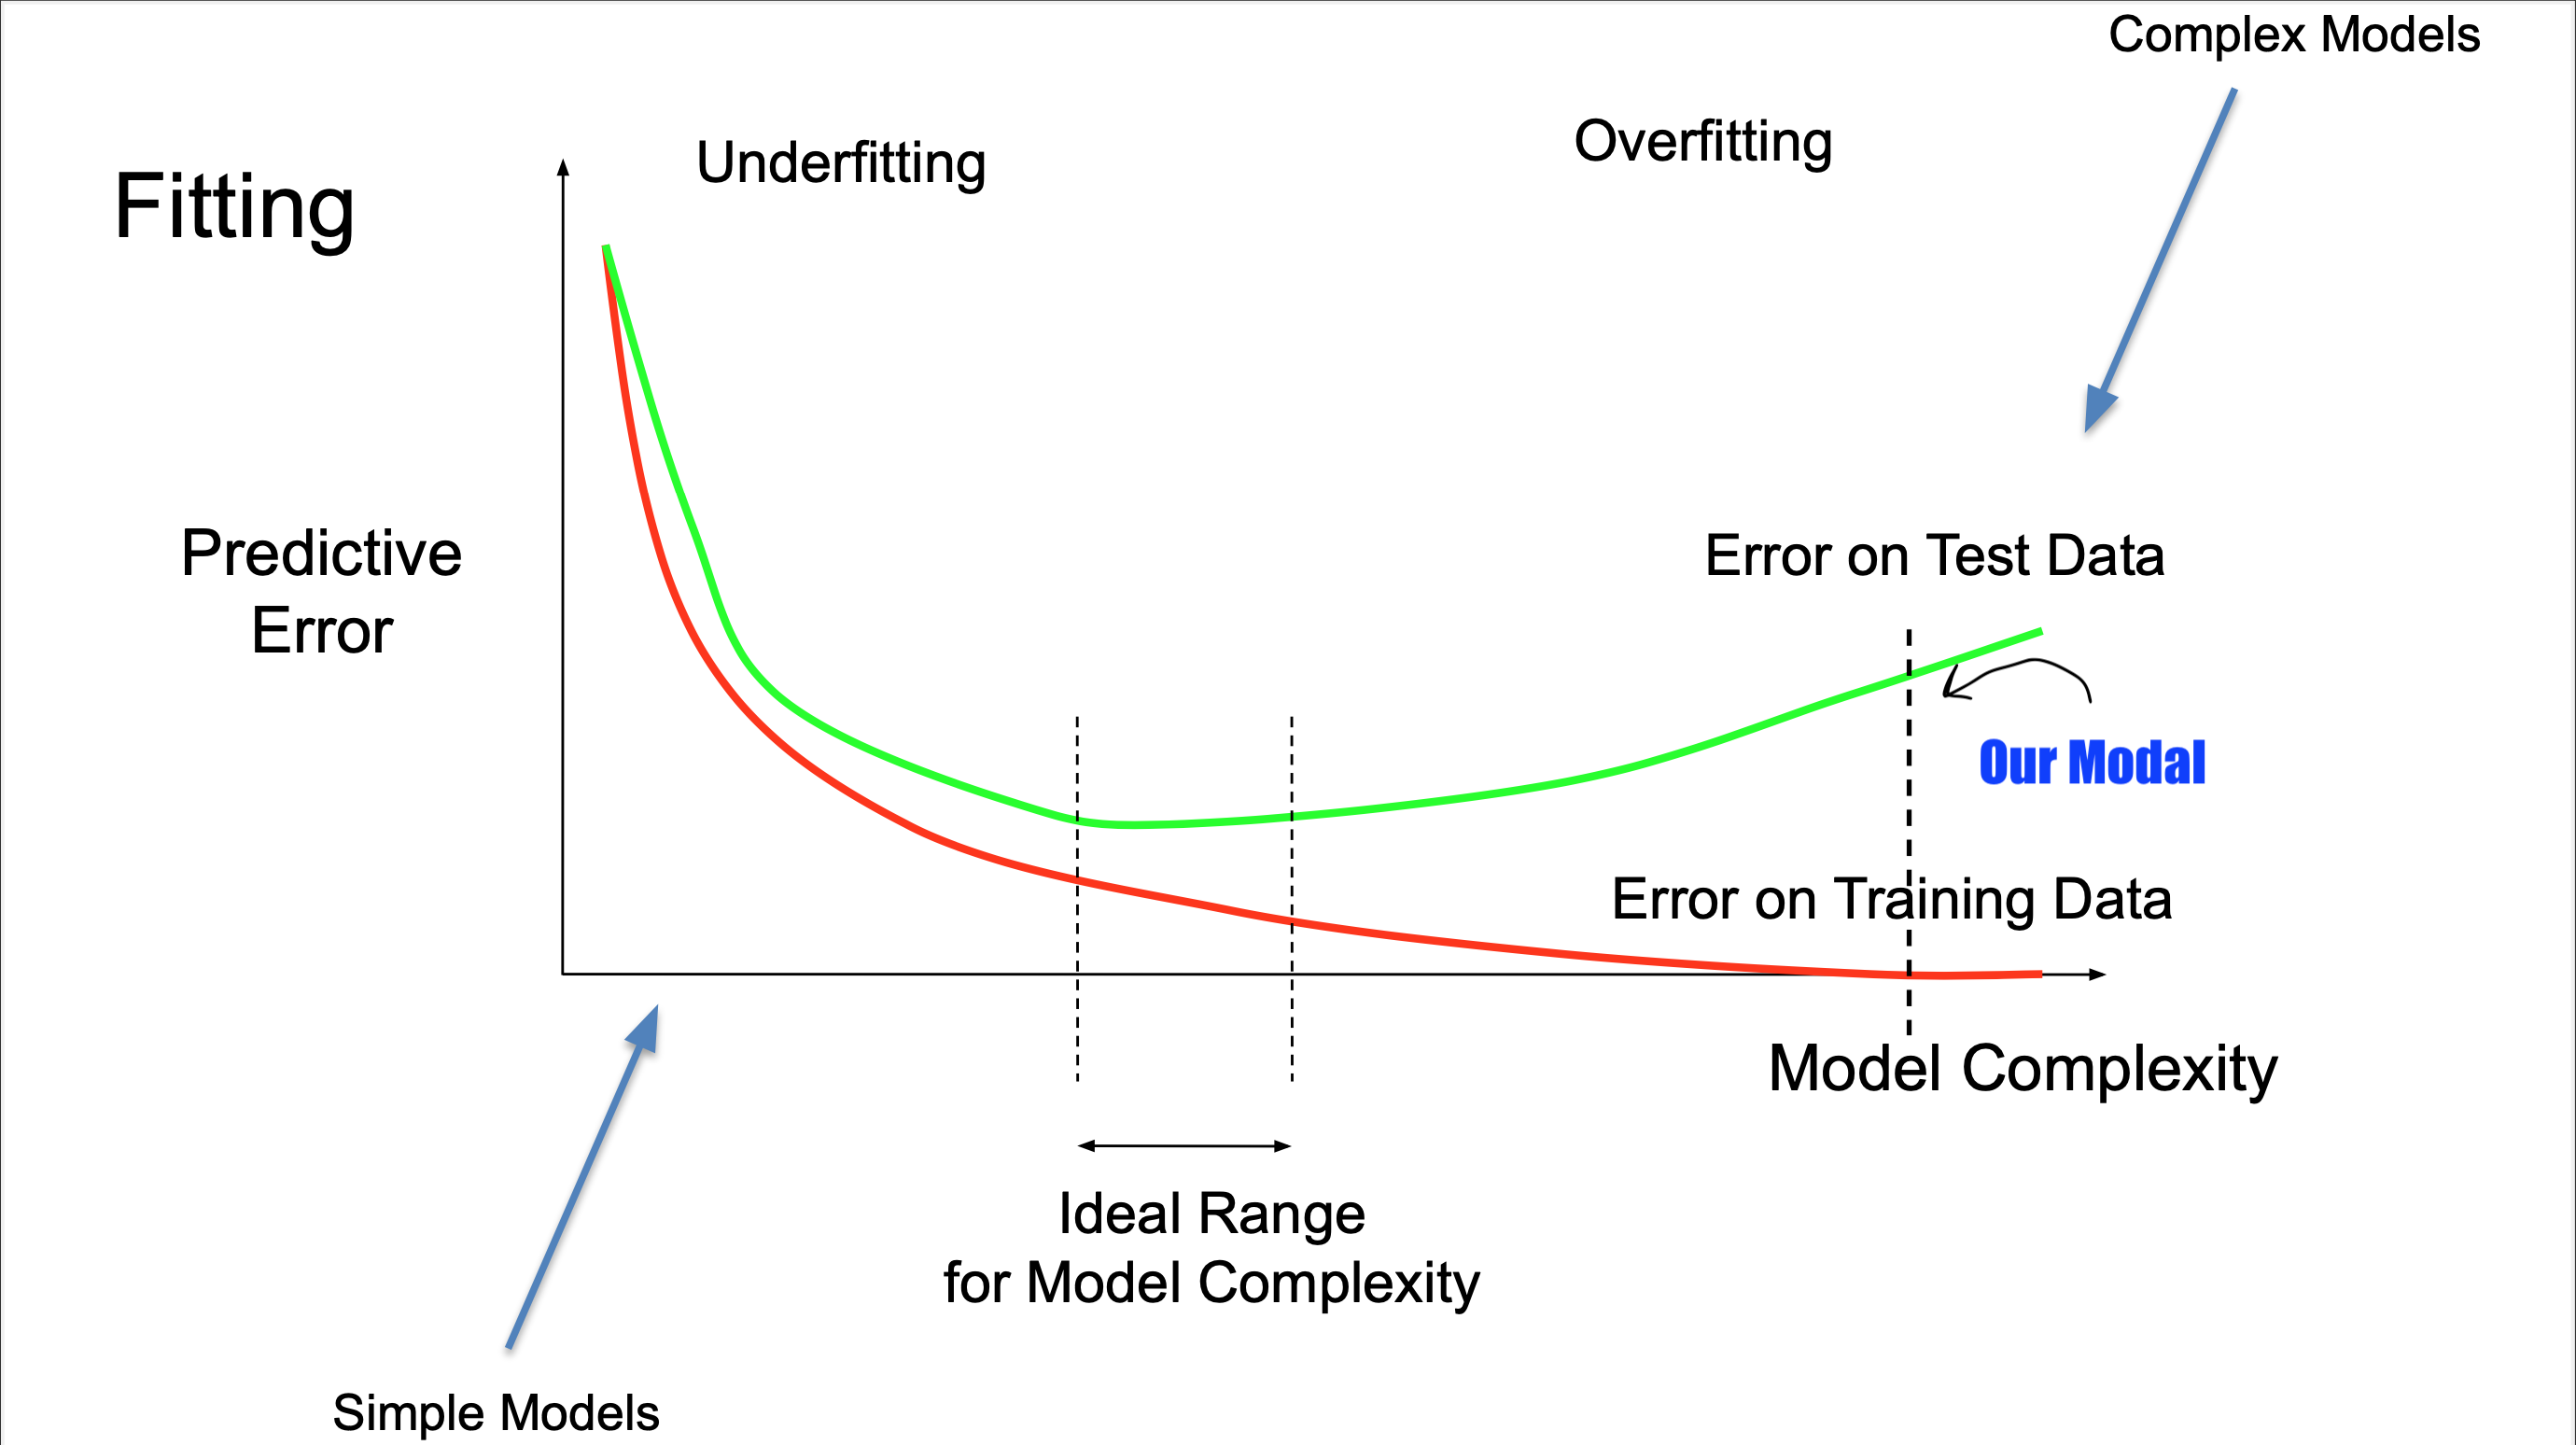

In [28]:
from IPython.display import Image
Image(filename='fitting_curve.png') 

#! warning, not dark mode friendly